<a href="https://colab.research.google.com/github/yohannaftali/polygon/blob/main/Polygon3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Prepare Dataset

import pandas as pd
from io import StringIO

# Paste after '''
coordinates = '''
0 0 0
0 5 1
2.5 7 1
5 7 2
8 9 1
9 3 2
12 1 2
6 0.5 1
4 3 1
2 1 0.05
0 0 0
'''

# Convert the string into a DataFrame with space separator, if use tab use sep='\t',
df = pd.read_csv(StringIO(coordinates), delim_whitespace=True, header=None, names=['x', 'y', 'z'])

# Save dataframe to coordinates.csv (optional)
df.to_csv('coordinates.csv', index=False)
df

,x,y,z
0,0.0,0.0,0.00
1,0.0,5.0,1.00
2,2.5,7.0,1.00
3,5.0,7.0,2.00
4,8.0,9.0,1.00
5,9.0,3.0,2.00
6,12.0,1.0,2.00
7,6.0,0.5,1.00
8,4.0,3.0,1.00
9,2.0,1.0,0.05


In [ ]:
# Alternative read coordinates from csv file
import pandas as pd

df = pd.read_csv('coordinates.csv')
df

,x,y,z
0,0.0,0.0,0.00
1,0.0,5.0,1.00
2,2.5,7.0,1.00
3,5.0,7.0,2.00
4,8.0,9.0,1.00
5,9.0,3.0,2.00
6,12.0,1.0,2.00
7,6.0,0.5,1.00
8,4.0,3.0,1.00
9,2.0,1.0,0.05


In [ ]:
# Convert points to numpy array

import numpy as np

# Extract x, y, and z coordinates from the DataFrame
x = df['x']
y = df['y']
z = df['z']

# Calculate the convex hull
points = np.array(list(zip(x, y, z)))
points

array([[ 0.  ,  0.  ,  0.  ],
       [ 0.  ,  5.  ,  1.  ],
       [ 2.5 ,  7.  ,  1.  ],
       [ 5.  ,  7.  ,  2.  ],
       [ 8.  ,  9.  ,  1.  ],
       [ 9.  ,  3.  ,  2.  ],
       [12.  ,  1.  ,  2.  ],
       [ 6.  ,  0.5 ,  1.  ],
       [ 4.  ,  3.  ,  1.  ],
       [ 2.  ,  1.  ,  0.05],
       [ 0.  ,  0.  ,  0.  ]])

In [ ]:
# Calculate the surface area of the polygon in 2D plane

surface_area = 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))
surface_area

55.5

In [ ]:
# Calculte area with convexHull
from scipy.spatial import ConvexHull

hull = ConvexHull(points)

# Calculate the surface area of the convex hull
surface_area = hull.volume
surface_area

24.070833333333336

In [ ]:
# Calculate area with Delaunay triangulation
from scipy.spatial import Delaunay

triangles = Delaunay(points)

# Calculate the surface area by summing the areas of triangles
surface_area = 0
areas = []  # Store the area of each tetrahedron
for simplex in triangles.simplices:
    v1, v2, v3, v4 = points[simplex]
    # Calculate the volume of the tetrahedron
    volume = np.abs(np.dot(v1 - v4, np.cross(v2 - v4, v3 - v4))) / 6.0
    surface_area += volume  # Approximate surface area using tetrahedron volume
    tetrahedron_area = volume  # Approximate surface area using tetrahedron volume
    areas.append(tetrahedron_area)

surface_area

40.0

In [ ]:
# Create polygon mesh

# Create a polygon mesh
polygon = [[(x[i], y[i], z[i]) for i in range(len(x))]]
polygon

[[(0.0, 0.0, 0.0),
  (0.0, 5.0, 1.0),
  (2.5, 7.0, 1.0),
  (5.0, 7.0, 2.0),
  (8.0, 9.0, 1.0),
  (9.0, 3.0, 2.0),
  (12.0, 1.0, 2.0),
  (6.0, 0.5, 1.0),
  (4.0, 3.0, 1.0),
  (2.0, 1.0, 0.05),
  (0.0, 0.0, 0.0)]]

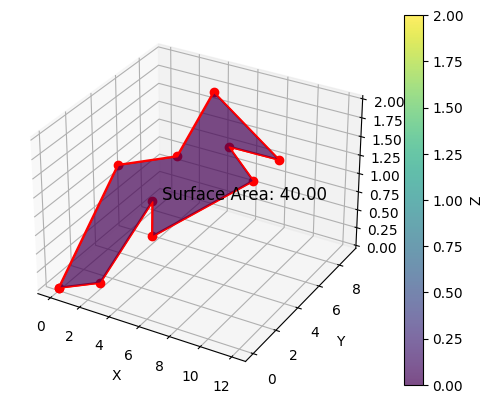

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot all points
ax.plot(x, y, z, 'ro-')  # 'ro-' means red circles connected by lines

# Define a colormap based on the Z-coordinate values
cmap = cm.viridis  # You can choose a different colormap here

# Normalize Z-values to fit within [0, 1] for colormap mapping
z_min = min(z)
z_max = max(z)
norm = plt.Normalize(z_min, z_max)

#polygon3d = Poly3DCollection(polygon, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25)
polygon3d = Poly3DCollection(polygon, cmap=cmap, norm=norm, edgecolors='r', alpha=0.7)

# Calculate the Z-values for each face (centroid Z-value)
#face_z_values = [np.mean([v[2] for v in face]) for face in polygon]
#polygon3d.set_array(np.array(face_z_values))

# Set facecolors based on Z-values
#polygon3d.set_array(np.array(z))

# Set facecolors based on Z-values
polygon3d.set_facecolor(cmap(norm(z)))

# Plot the polygon surface
#ax.add_collection3d(polygon3d)
ax.add_collection3d(polygon3d)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Create a colorbar to indicate the Z-values
cbar = fig.colorbar(polygon3d, ax=ax, label='Z')

# Display the surface area on the chart
center_x = np.mean(x)
center_y = np.mean(y)
center_z = np.mean(z)
ax.text(center_x, center_y, center_z, f'Surface Area: {surface_area:.2f}', fontsize=12)

# Show the plot
plt.show()
